In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_keys

In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_keys
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e2bc90f5254751268ceffe0a68e59eb9


In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

amderma ru
mayya ru
ostrovnoy ru
kaitangata nz
ushuaia ar
khandbari np
tsihombe mg
punta arenas cl
taolanaro mg
egvekinot ru
ushuaia ar
busselton au
ushuaia ar
lorengau pg
hermanus za
marmande fr
tineo es
bongandanga cd
kloulklubed pw
yulin cn
egvekinot ru
belushya guba ru
atuona pf
port elizabeth za
tiksi ru
vaitupu wf
vaini to
nelson bay au
dzhusaly kz
ust-kuyga ru
bluff nz
sentyabrskiy ru
hobart au
bluff nz
la ronge ca
tasiilaq gl
pisco pe
nikolskoye ru
kapaa us
mataura pf
fort nelson ca
kashi cn
ponta do sol cv
klaksvik fo
arraial do cabo br
hilo us
georgetown sh
hobart au
albany au
saint george bm
ushuaia ar
tamworth au
bambous virieux mu
namibe ao
rikitea pf
butaritari ki
ust-kamchatsk ru
tabat sd
hermanus za
taolanaro mg
yellowknife ca
tyler us
jiaojiang cn
atuona pf
poum nc
nikolskoye ru
macomer it
mataura pf
kiama au
bull savanna jm
kathu th
dzerzhinskoye ru
duzici tr
corrales pe
tongliao cn
khandyga ru
rikitea pf
seoul kr
pisco pe
castro cl
mackay au
georgetown sh
barawe so
h

vaini to
banjar id
payo ph
mataura pf
busselton au
hobart au
cartagena es
busselton au
vardo no
east london za
margate za
new norfolk au
ushuaia ar
sioux lookout ca
payo ph
turmalina br
olinda br
shache cn
new norfolk au
qaanaaq gl
busselton au
harper lr
malyye derbety ru
talalayivka ua
grindavik is
butaritari ki
ushuaia ar
felidhoo mv
vila velha br
ushuaia ar
hermanus za
svetlyy ru
shache cn
gat ly
jamestown sh
los llanos de aridane es
ribeira grande pt
punta arenas cl
jamestown sh
gladstone au
punta arenas cl
porto novo cv
felidhoo mv
taolanaro mg
cape town za
kruisfontein za
tuktoyaktuk ca
mataura pf
mataura pf
port alfred za
cape town za
pisco pe
tottori jp
ushuaia ar
mataura pf
artyk ru
mahebourg mu
butaritari ki
hobart au
arraial do cabo br
buraydah sa
dhidhdhoo mv
constitucion mx
killybegs ie
castro cl
ushuaia ar
vardo no
burkhala ru
hilo us
san jeronimo mx
rocha uy
longyearbyen sj
atuona pf
nizhneyansk ru
nanortalik gl
upernavik gl
castro cl
ushuaia ar
margate za
skjervoy no
na

kosonsoy uz
rikitea pf
victoria sc
rikitea pf
cockburn town bs
rikitea pf
hilo us
east london za
victoria sc
carnarvon au
saldanha za
fortuna us
nguiu au
dawson creek ca
rikitea pf
ushuaia ar
poniatowa pl
college us
lewistown us
yellowknife ca
barrow us
merauke id
lorengau pg
bonaventure ca
mar del plata ar
kodiak us
cairns au
souillac mu
hobart au
beloha mg
ribeira grande pt
sao gabriel da cachoeira br
rio grande br
sawtell au
tura ru
ketchikan us
esperance au
rikitea pf
xining cn
port alfred za
tiksi ru
hami cn
albany au
nizhneyansk ru
hermanus za
necochea ar
jamestown sh
khatanga ru
lubango ao
clyde river ca
jamestown sh
maxixe mz
batticaloa lk
nikolskoye ru
port elizabeth za
chapais ca
rocha uy
vaini to
mentok id
xai-xai mz
souillac mu
yuancheng cn
orange cove us
east london za
west plains us
bredasdorp za
thompson ca
rikitea pf
barentsburg sj
nouadhibou mr
berlevag no
narsaq gl
leningradskiy ru
taolanaro mg
metro id
kaitangata nz
mataura pf
liverpool ca
karratha au
joaima br
port 

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

637

In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    city_data.append(city_url)

In [12]:
print(city_data)


['http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e2bc90f5254751268ceffe0a68e59eb9&q=amderma', 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e2bc90f5254751268ceffe0a68e59eb9&q=mayya', 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e2bc90f5254751268ceffe0a68e59eb9&q=ostrovnoy', 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e2bc90f5254751268ceffe0a68e59eb9&q=kaitangata', 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e2bc90f5254751268ceffe0a68e59eb9&q=ushuaia', 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e2bc90f5254751268ceffe0a68e59eb9&q=khandbari', 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e2bc90f5254751268ceffe0a68e59eb9&q=tsihombe', 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e2bc90f5254751268ceffe0a68e59eb9&q=punta arenas', 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e2bc90f

In [13]:
#counter=0
city_list=[]
counter=0
for city_url in city_data:
    if(counter==1):
        city_weather = requests.get(city_url.replace(" ","+")).json()
        print(city_weather)
    try:
        city_weather = requests.get(city_url.replace(" ","+")).json()
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_list.append({"City": city_weather["name"],
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    except:
        print("bad city")
        pass
    counter=counter+1
 #   city_list.append(requests.get(city.replace(' ','+')))
   # print(f"processing record {counter +1} of set {counter} | {city.replace(' ','+')}")
   # counter +=1
#       try:
#         # Parse the JSON and retrieve data.
#         city_weather = requests.get(city_url.replace(' ','+')).json()
#         # Parse out the needed data.
#         city_lat = city_weather["coord"]["lat"]
#         city_lng = city_weather["coord"]["lon"]
#         city_max_temp = city_weather["main"]["temp_max"]
#         city_humidity = city_weather["main"]["humidity"]
#         city_clouds = city_weather["clouds"]["all"]
#         city_wind = city_weather["wind"]["speed"]
#         city_country = city_weather["sys"]["country"]
#         # Convert the date to ISO standard.
#         city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
#         # Append the city information into city_data list.
#         city_data.append({"City": city.title(),
#                           "Lat": city_lat,
#                           "Lng": city_lng,
#                           "Max Temp": city_max_temp,
#                           "Humidity": city_humidity,
#                           "Cloudiness": city_clouds,
#                           "Wind Speed": city_wind,
#                           "Country": city_country,
#                           "Date": city_date})

# If an error is experienced, skip the city.
#     except:
#         print("City not found. Skipping...")
#         pass

#     # Indicate that Data Loading is complete.
#     print("-----------------------------")
       # print("Data Retrieval Complete      ")
#     print("-----------------------------")
    
    

bad city
{'coord': {'lon': 130.2811, 'lat': 61.7333}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 14, 'feels_like': 5.41, 'temp_min': 14, 'temp_max': 14, 'pressure': 1011, 'humidity': 67}, 'visibility': 10000, 'wind': {'speed': 4.47, 'deg': 320}, 'clouds': {'all': 0}, 'dt': 1617106355, 'sys': {'type': 1, 'id': 8854, 'country': 'RU', 'sunrise': 1617050910, 'sunset': 1617098283}, 'timezone': 32400, 'id': 2020121, 'name': 'Mayya', 'cod': 200}
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city
bad city


In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_list)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mayya,61.7333,130.2811,14.00,67,0,4.47,RU,2021-03-30 12:12:35
1,Ostrovnoy,68.0531,39.5131,34.00,96,100,17.27,RU,2021-03-30 12:12:36
2,Kaitangata,-46.2817,169.8464,53.35,97,100,2.48,NZ,2021-03-30 12:12:36
3,Ushuaia,-54.8000,-68.3000,48.20,71,75,41.43,AR,2021-03-30 12:11:53
4,Khanbari,27.3747,87.2039,73.96,31,100,6.53,NP,2021-03-30 12:12:36
5,Punta Arenas,-53.1500,-70.9167,48.20,87,40,14.97,CL,2021-03-30 12:11:51
6,Egvekinot,66.3167,-179.1667,-3.28,83,97,7.54,RU,2021-03-30 12:12:37
7,Busselton,-33.6500,115.3333,65.35,84,9,5.91,AU,2021-03-30 12:12:37
8,Lorengau,-2.0226,147.2712,81.48,76,91,2.48,PG,2021-03-30 12:12:37
9,Hermanus,-34.4187,19.2345,71.01,66,39,8.01,ZA,2021-03-30 12:12:38


In [15]:
# Create the output file (CSV).
output_data_file = "cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [17]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 0
set_count = 1

# Loop through all the cities in our list.
for i, item in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        print(i)
        
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[record_count]
    set_count += 1
    record_count += 1
        
 # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {item}")
    # Add 1 to the record count.
#record_count += 1

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 2 | amderma
Processing Record 2 of Set 3 | mayya
Processing Record 3 of Set 4 | ostrovnoy
Processing Record 4 of Set 5 | kaitangata
Processing Record 5 of Set 6 | ushuaia
Processing Record 6 of Set 7 | khandbari
Processing Record 7 of Set 8 | tsihombe
Processing Record 8 of Set 9 | punta arenas
Processing Record 9 of Set 10 | taolanaro
Processing Record 10 of Set 11 | egvekinot
Processing Record 11 of Set 12 | busselton
Processing Record 12 of Set 13 | lorengau
Processing Record 13 of Set 14 | hermanus
Processing Record 14 of Set 15 | marmande
Processing Record 15 of Set 16 | tineo
Processing Record 16 of Set 17 | bongandanga
Processing Record 17 of Set 18 | kloulklubed
Processing Record 18 of Set 19 | yulin
Processing Record 19 of Set 20 | belushya guba
Processing Record 20 of Set 21 | atuona
Processing Record 21 of Set 22 | port elizabeth
Processing Record 22 of Set 23 | tiksi
Processing Record 23 

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

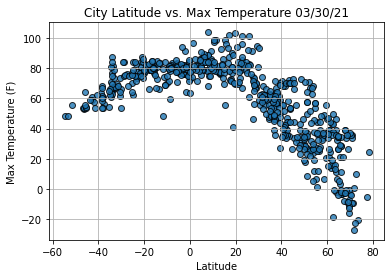

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

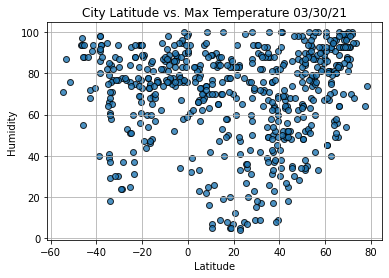

In [20]:

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

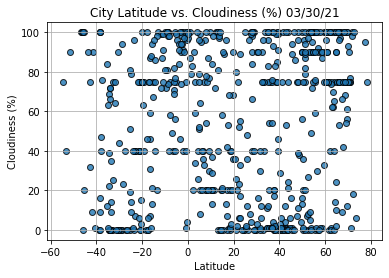

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

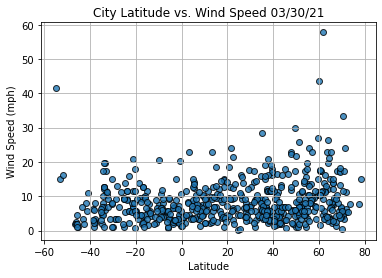

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

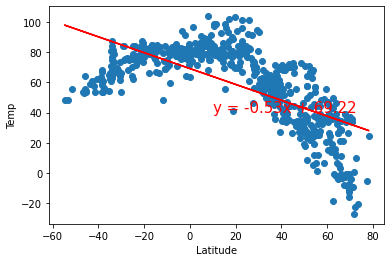

In [23]:
# Import linregress
from scipy.stats import linregress

# Perform linear regression.
x_values=lats
y_values=max_temps
y_label="Temp"
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = x_values * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(x_values,y_values)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(x_values,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel(y_label)
plt.show()

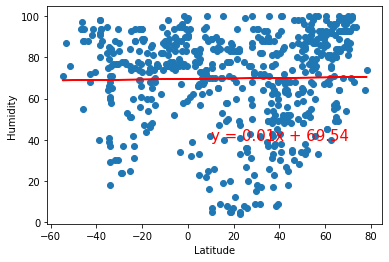

In [24]:
# Perform linear regression.
x_values=lats
y_values=humidity

(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = x_values * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(x_values,y_values)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(x_values,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

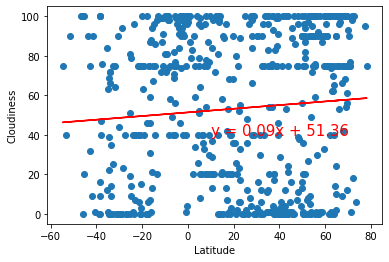

In [25]:
# Perform linear regression.
x_values=lats
y_values=cloudiness

(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = x_values * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(x_values,y_values)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(x_values,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

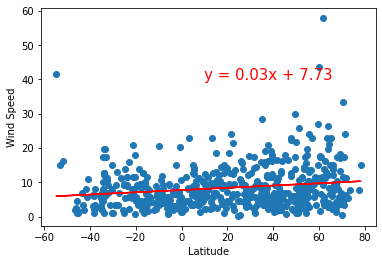

In [26]:
# Perform linear regression.
x_values=lats
y_values=wind_speed

(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = x_values * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(x_values,y_values)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(x_values,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

In [27]:
index13 = city_data_df.loc[13]
index13

City                  Kloulklubed
Lat                        7.0419
Lng                       134.256
Max Temp                     78.8
Humidity                       94
Cloudiness                     75
Wind Speed                   3.44
Country                        PW
Date          2021-03-30 12:12:39
Name: 13, dtype: object

In [28]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3      False
4       True
       ...  
575     True
576     True
577     True
578    False
579     True
Name: Lat, Length: 580, dtype: bool

In [29]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mayya,61.7333,130.2811,14.00,67,0,4.47,RU,2021-03-30 12:12:35
1,Ostrovnoy,68.0531,39.5131,34.00,96,100,17.27,RU,2021-03-30 12:12:36
4,Khanbari,27.3747,87.2039,73.96,31,100,6.53,NP,2021-03-30 12:12:36
6,Egvekinot,66.3167,-179.1667,-3.28,83,97,7.54,RU,2021-03-30 12:12:37
10,Marmande,44.5000,0.1667,70.00,52,6,5.01,FR,2021-03-30 12:12:38


In [30]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [31]:
def plot_linear_regression(x,y,x_label,y_label,tuple):
    # Perform linear regression.

    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept

    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create a scatter plot of the x and y values.
    plt.scatter(x_values,y_values)
    # Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation and add its coordinates.
    plt.annotate(line_eq, (10,40), fontsize=15, color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    return plt.show()

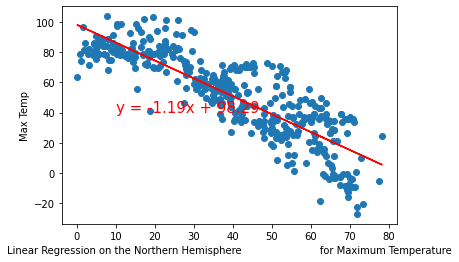

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

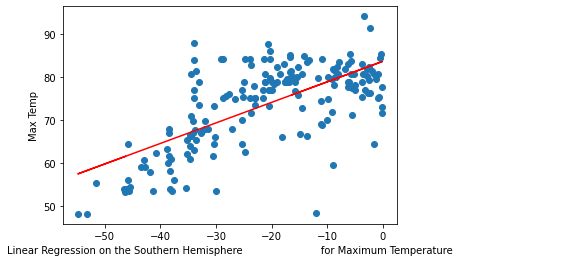

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

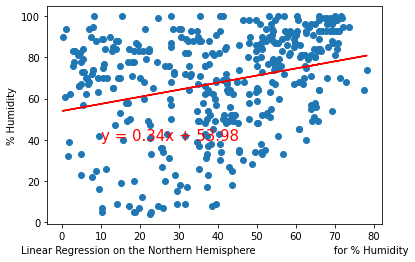

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

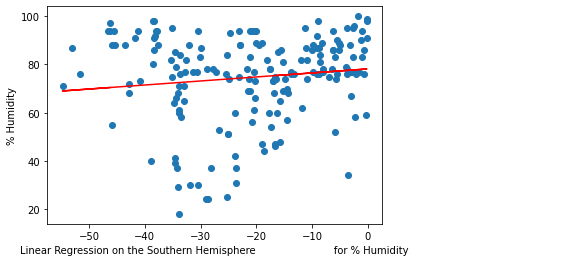

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

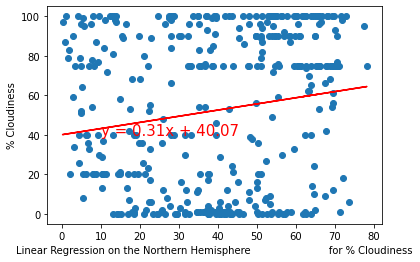

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

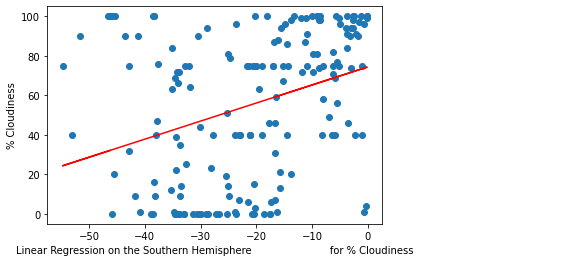

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

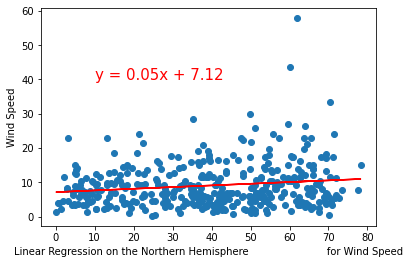

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

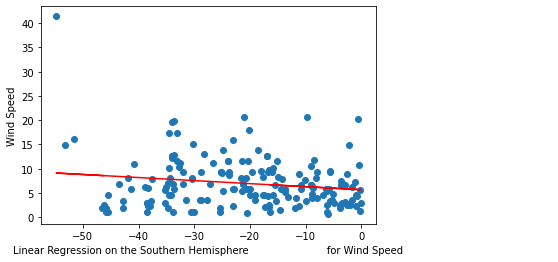

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))